<a href="https://colab.research.google.com/github/MANDOJU1/pandas/blob/main/5_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 대중교통 통계자료 https://www.t-money.co.kr/ncs/pct/ugd/ReadTrcrStstList.dev

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 로드

In [15]:
df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls", sheet_name=2, usecols="B, D:H", thousands=",")
df_subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1479117,1428188,236809,228836
1,1호선,시청,691098,693899,107105,103074
2,1호선,종각,989168,970072,162080,151268


In [16]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     620 non-null    object
 1   지하철역    620 non-null    object
 2   유임승차    620 non-null    int64 
 3   유임하차    620 non-null    int64 
 4   무임승차    620 non-null    int64 
 5   무임하차    620 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.2+ KB


### 데이터 탐색

In [17]:
# 행, 열
df_subway.shape

(620, 6)

In [18]:
# 지하철역 숫자 세기
df_subway['지하철역'].value_counts()

지하철역
서울역         5
김포공항        4
공덕          4
고속터미널       3
디지털미디어시티    3
           ..
초지          1
고잔          1
중앙          1
한대앞         1
관악산(서울대)    1
Name: count, Length: 528, dtype: int64

## 데이터 분석
- 유임승차비율이 가장 높은 역은?
       - 유임승차비율 = 유임승차 / 무임승차
       - 유임승차비율2 = 유임승차 / (무임승차 + 유임승차) * 100

- 무임승차비율이 가장 높은 역은?

In [20]:
df_subway['유임승차비율'] = round(df_subway['유임승차'] / df_subway['무임승차'], 1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,1호선,서울역,1479117,1428188,236809,228836,6.2
1,1호선,시청,691098,693899,107105,103074,6.5
2,1호선,종각,989168,970072,162080,151268,6.1
3,1호선,종로3가,519210,467584,306638,280264,1.7
4,1호선,종로5가,490609,478781,268475,260570,1.8


In [26]:
# 유임승차비율 정렬
df_subway.sort_values('유임승차비율', ascending=False)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
192,경원선,창동,90,0,0,0,inf
335,경의선,검암,1,0,0,0,inf
334,경의선,계양,6,0,0,0,inf
525,7호선,부평구청,1,0,0,0,inf
269,일산선,지축,67,0,1,0,67.0
...,...,...,...,...,...,...,...
299,중앙선,지평,885,1177,1239,1289,0.7
297,중앙선,원덕,5317,5167,7501,7241,0.7
329,경의선,운천,83,28,148,117,0.6
211,경원선,연천,15139,14641,30962,32183,0.5


In [45]:
# 유임승차비율 != inf & 유임승차비율 > 0
condition = (df_subway['유임승차비율'] != np.inf) & (df_subway['유임승차비율'] > 0) & (df_subway['유임승차'] > 10000)

In [47]:
# 호선명, 지하철역, 유임승차비율
# df_subway.loc[condition][['호선명','지하철역','유임승차비율']].sort_values('유임승차비율', ascending=False)
df_subway.loc[condition, ['호선명','지하철역','유임승차비율']].sort_values('유임승차비율', ascending=False)

,호선명,지하철역,유임승차비율
18,2호선,한양대,26.3
571,공항철도 1호선,홍대입구,20.6
48,2호선,홍대입구,20.5
465,6호선,한강진,15.7
120,경부선,서울역,15.3
...,...,...,...
7,1호선,제기동,0.9
602,우이신설선,삼양사거리,0.9
298,중앙선,용문,0.8
211,경원선,연천,0.5


In [48]:
df_subway['유임승차비율2'] = round(df_subway['유임승차'] / (df_subway['유임승차'] + df_subway['무임승차']) * 100, 1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
0,1호선,서울역,1479117,1428188,236809,228836,6.2,86.2
1,1호선,시청,691098,693899,107105,103074,6.5,86.6
2,1호선,종각,989168,970072,162080,151268,6.1,85.9
3,1호선,종로3가,519210,467584,306638,280264,1.7,62.9
4,1호선,종로5가,490609,478781,268475,260570,1.8,64.6


In [49]:
df_subway.sort_values('유임승차비율2', ascending=False).head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
192,경원선,창동,90,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0
334,경의선,계양,6,0,0,0,inf,100.0
269,일산선,지축,67,0,1,0,67.0,98.5
240,분당선,복정,192,0,3,0,64.0,98.5
72,3호선,충무로,312,0,9,0,34.7,97.2
448,6호선,연신내,104,0,4,0,26.0,96.3
18,2호선,한양대,385782,435583,14645,15699,26.3,96.3
571,공항철도 1호선,홍대입구,463385,446277,22461,20736,20.6,95.4


In [52]:
# 유임승차인원 > 10000 , 내림차순
condition = (df_subway['유임승차'] > 10000)
df_subway.loc[condition, ['호선명','지하철역','유임승차비율2']].sort_values('유임승차비율2', ascending=False)

,호선명,지하철역,유임승차비율2
18,2호선,한양대,96.3
48,2호선,홍대입구,95.4
571,공항철도 1호선,홍대입구,95.4
465,6호선,한강진,94.0
120,경부선,서울역,93.9
...,...,...,...
602,우이신설선,삼양사거리,48.7
7,1호선,제기동,46.8
298,중앙선,용문,45.2
211,경원선,연천,32.8


In [54]:
# 무임승차 비율이 가장 높은 곳은?
df_subway.loc[condition].sort_values('유임승차비율2').head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
208,경원선,소요산,16264,16382,50893,49270,0.3,24.2
211,경원선,연천,15139,14641,30962,32183,0.5,32.8
298,중앙선,용문,36954,36874,44852,44476,0.8,45.2
7,1호선,제기동,249016,238896,283615,303596,0.9,46.8
602,우이신설선,삼양사거리,40067,39989,42209,41806,0.9,48.7
9,1호선,동묘앞,176547,186029,175272,177168,1.0,50.2
290,중앙선,운길산,15519,14787,15215,15463,1.0,50.5
601,우이신설선,삼양,33523,33645,31311,34004,1.1,51.7
195,경원선,도봉산,144216,83656,133905,105998,1.1,51.9
608,우이신설선,신설동,38250,38189,35088,30923,1.1,52.2


## 유무임 승하차 인원이 가장 많은 역

In [67]:
# 유임승차인원이 가장 많은 역
# 1번방법
# df_subway.sort_values('유임승차', ascending=False).head(1)
# 2번방법
df_subway[df_subway['유임승차'].max() == df_subway['유임승차']]

# 가장 적은 역
df_subway[df_subway['유임승차'].min() == df_subway['유임승차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0


In [61]:
# 유임하차인원이 가장 많은 역
df_subway.sort_values('유임하차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
48,2호선,홍대입구,2181301,2370397,106253,103537,20.5,95.4


In [62]:
# 무임승차인원이 가장 많은 역
df_subway.sort_values('무임승차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
125,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1


In [63]:
# 무임하차인원이 가장 많은 역
df_subway.sort_values('무임하차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
125,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1


## 시각화


In [70]:
# 유임승차 >= 1000000

condition = df_subway['유임승차'] >= 1000000
df_chart = df_subway.loc[condition, ['지하철역',	'유임승차',	'유임하차',	'무임승차',	'무임하차']]

In [71]:
df_chart.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1479117,1428188,236809,228836
11,을지로입구,1319969,1355563,107082,99955
20,성수,1185919,1320446,106377,106981
21,건대입구,1088906,1138735,102314,105211
25,잠실(송파구청),2255264,2218730,236852,224844


In [73]:
# 인덱스 설정 : 지하철역

df_chart = df_chart.set_index('지하철역').T

In [ ]:
len(df_chart)
len(df_chart.columns)

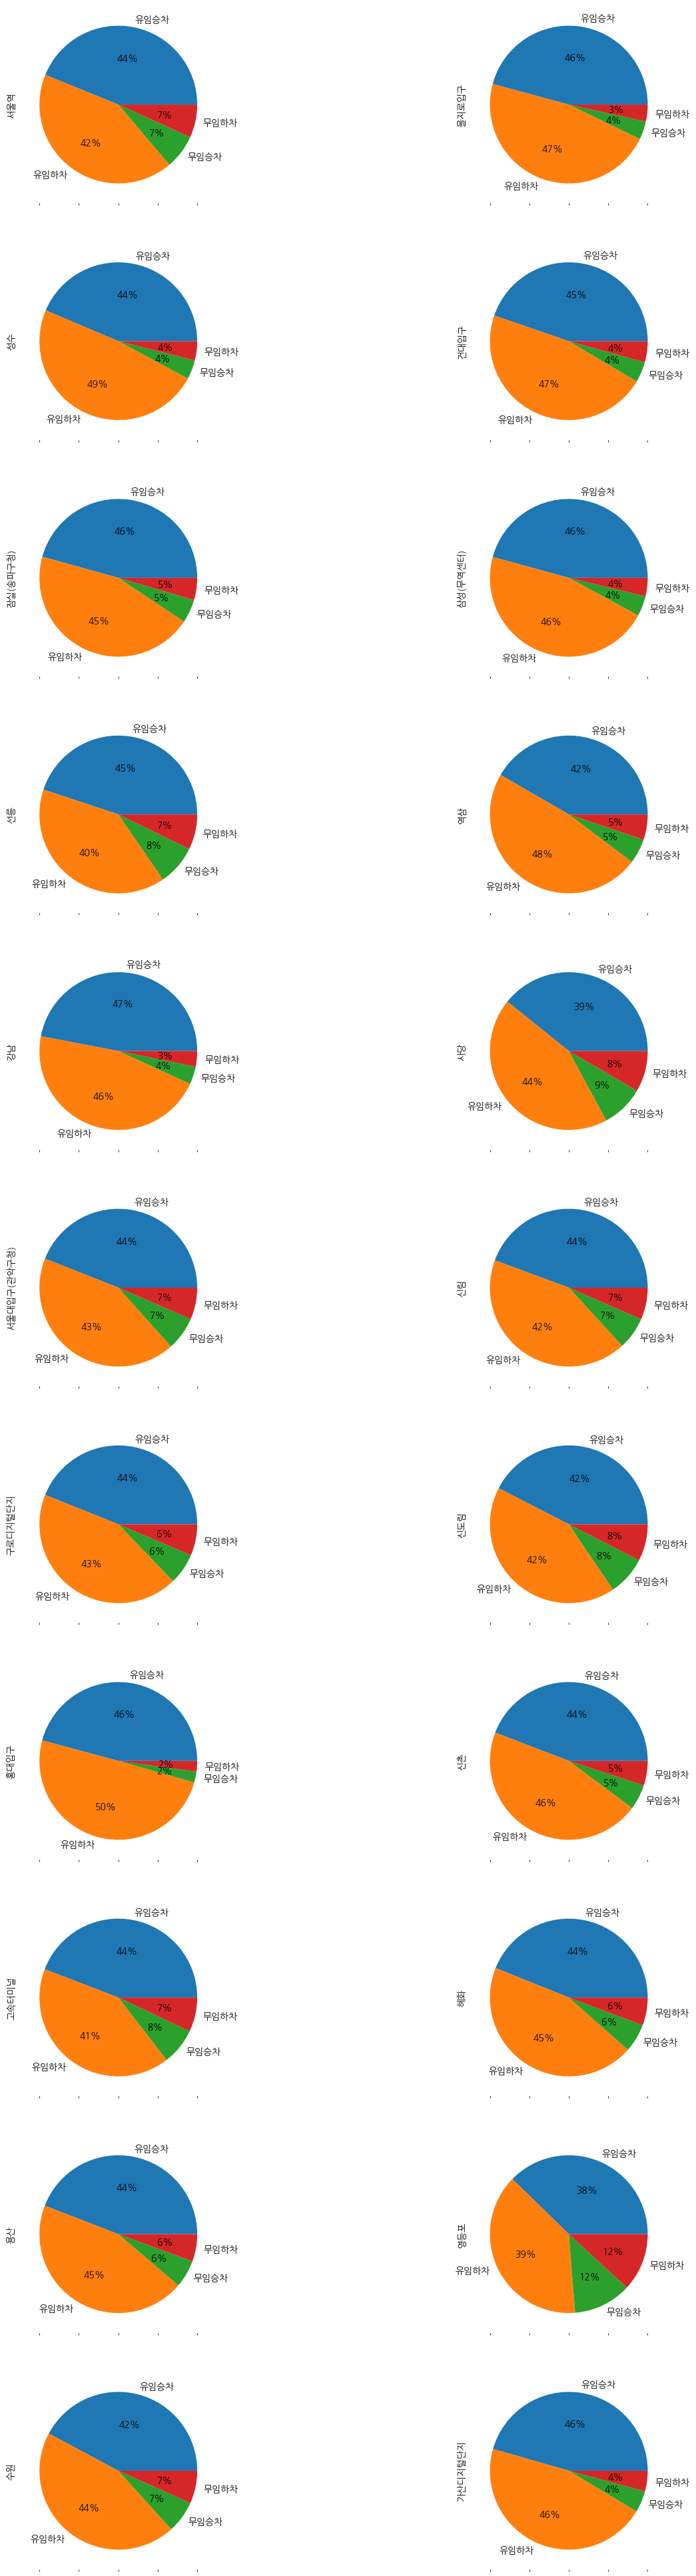

In [78]:
# pie 그래프

df_chart.plot.pie(subplots=True, layout=(11,2), autopct="%1.f%%", legend=False, figsize=(16,50));

## 시간대별

In [81]:
# 호선명, 지하철역, 4:00 ~ 24:00
df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls", sheet_name=3, usecols="B, D:AT", thousands=",", skiprows=1)
df_subway.head(3)

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.16,하차.16,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19,승차.20,하차.20
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464


### 데이터 전처리
- 컬럼명 변경
  호선명, 지하철역, 승차_4, 하차_4, 승차_5, ..., 하차_24

In [91]:
# df_subway.columns = ['호선명','지하철역','승차_4', ...]
# 위에코드는 너무 길게 써야함

list1 = ['호선명','지하철역']
for i in range(4, 25):
  list1.append("승차_" + str(i))
  list1.append("하차_" + str(i))

df_subway.columns = list1
df_subway

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464
3,1호선,종로3가,194,7,4294,2708,4106,14292,6284,29101,...,54181,14575,57716,11432,44832,8986,21757,5957,2307,2498
4,1호선,종로5가,53,1,2233,3786,3435,18472,6016,44110,...,38774,11940,34722,8514,22492,6320,6968,4295,415,1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,신림선,당곡,0,0,2136,209,4543,1179,13836,3883,...,4578,8241,3129,7401,2177,7082,1085,4404,231,1581
616,신림선,신림,1,0,1182,314,1609,827,4622,1598,...,2157,4299,1841,3746,1674,3235,899,2215,329,938
617,신림선,서원,2,0,2355,336,4543,863,14111,1442,...,1886,7007,1401,7197,1232,7027,494,4474,123,1488
618,신림선,서울대벤처타운,13,1,7001,531,11241,4171,32600,6848,...,7058,18068,5540,18153,5774,17571,2264,12976,599,6024


## 분석
- 출퇴근 시간대(7~9) 사람들이 가장 많이 타는 역 찾기

In [92]:
df_subway['출근 계'] = df_subway['승차_7'] + df_subway['승차_8'] + df_subway['승차_9']
df_subway['하차 계'] = df_subway['하차_7'] + df_subway['하차_8'] + df_subway['하차_9']

In [94]:
df_subway[df_subway['출근 계'].max() == df_subway['출근 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
39,2호선,신림,217,5,39624,4285,72112,18451,184578,29861,...,44869,123630,37752,115187,22235,74882,4587,24826,617864,120512


In [95]:
df_subway[df_subway['하차 계'].max() == df_subway['하차 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
30,2호선,역삼,55,1,3902,7881,9260,41795,16692,157268,...,77816,20958,53189,17724,21018,11143,3622,3564,68880,816320
